In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [70]:
# import Excel file
file_path ='D:/Projects/Impact of car features/Dataset.xlsx'

In [71]:
df = pd.read_excel(file_path, engine='openpyxl')

In [72]:
df.head(10)

,Manufacturer,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [74]:
# Check for null Values
print(df.isnull().sum())

Manufacturer            0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [75]:
# drop null values
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

Manufacturer         0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [100]:
df.drop(['city mpg', 'Number of Doors'], axis=1, inplace=True)

In [101]:
# change data type
df['Engine HP'] = df['Engine HP'].astype('int')
df['Engine Cylinders'] = df['Engine Cylinders'].astype('int')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8084 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Manufacturer       8084 non-null   object
 1   Model              8084 non-null   object
 2   Year               8084 non-null   int64 
 3   Engine Fuel Type   8084 non-null   object
 4   Engine HP          8084 non-null   int64 
 5   Engine Cylinders   8084 non-null   int64 
 6   Transmission Type  8084 non-null   object
 7   Driven_Wheels      8084 non-null   object
 8   Market Category    8084 non-null   object
 9   Vehicle Size       8084 non-null   object
 10  Vehicle Style      8084 non-null   object
 11  highway MPG        8084 non-null   int64 
 12  Popularity         8084 non-null   int64 
 13  MSRP               8084 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 947.3+ KB


In [105]:
df[['Popularity', 'MSRP']].describe()

,Popularity,MSRP
count,8084.000000,8.084000e+03
mean,1499.397823,5.007267e+04
std,1413.855615,7.029313e+04
min,2.000000,2.000000e+03
25%,549.000000,2.591875e+04
50%,1013.000000,3.500500e+04
75%,2009.000000,4.872250e+04
max,5657.000000,2.065902e+06


# Exploratory Data Analysis

## Popularity

In [78]:
High_popularity = df.groupby(['Manufacturer'], as_index=False)['Popularity'].sum().sort_values(by='Popularity', ascending=False).head(10)

In [79]:
High_popularity

,Manufacturer,Popularity
14,Ford,2783244
4,BMW,1307944
3,Audi,1018440
9,Chevrolet,850390
8,Cadillac,644728
18,Honda,620964
33,Nissan,618772
44,Toyota,609300
11,Dodge,592320
45,Volkswagen,507213


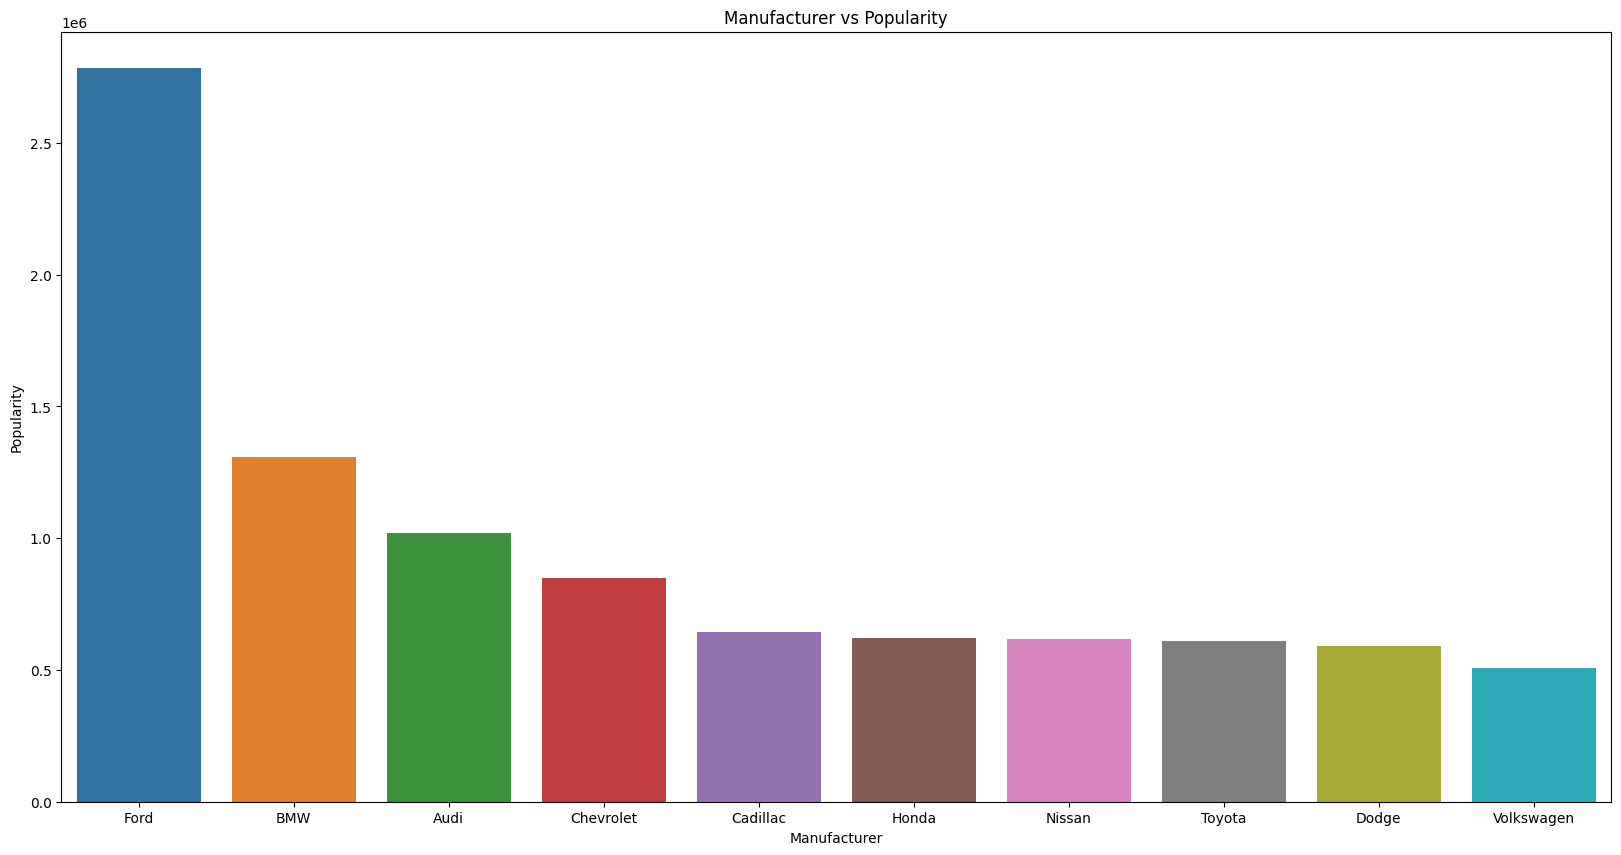

In [80]:
# Top 10 Manufacturers by Popularity
plt.figure(figsize=(20,10))
sns.barplot(x = 'Manufacturer',y= 'Popularity', data = High_popularity,hue='Manufacturer')
plt.title('Manufacturer vs Popularity')
plt.show()

## Market Category

In [81]:
Market_demand= df.groupby(['Market Category'], as_index=False)['Manufacturer'].count().sort_values(by='Manufacturer', ascending=False).head(10)

In [82]:
Market_demand

,Market Category,Manufacturer
0,Crossover,1103
40,Flex Fuel,872
62,Luxury,851
66,"Luxury,Performance",673
49,Hatchback,614
68,Performance,584
16,"Crossover,Luxury",410
63,"Luxury,High-Performance",334
59,"Hatchback,Performance",252
30,"Exotic,High-Performance",252


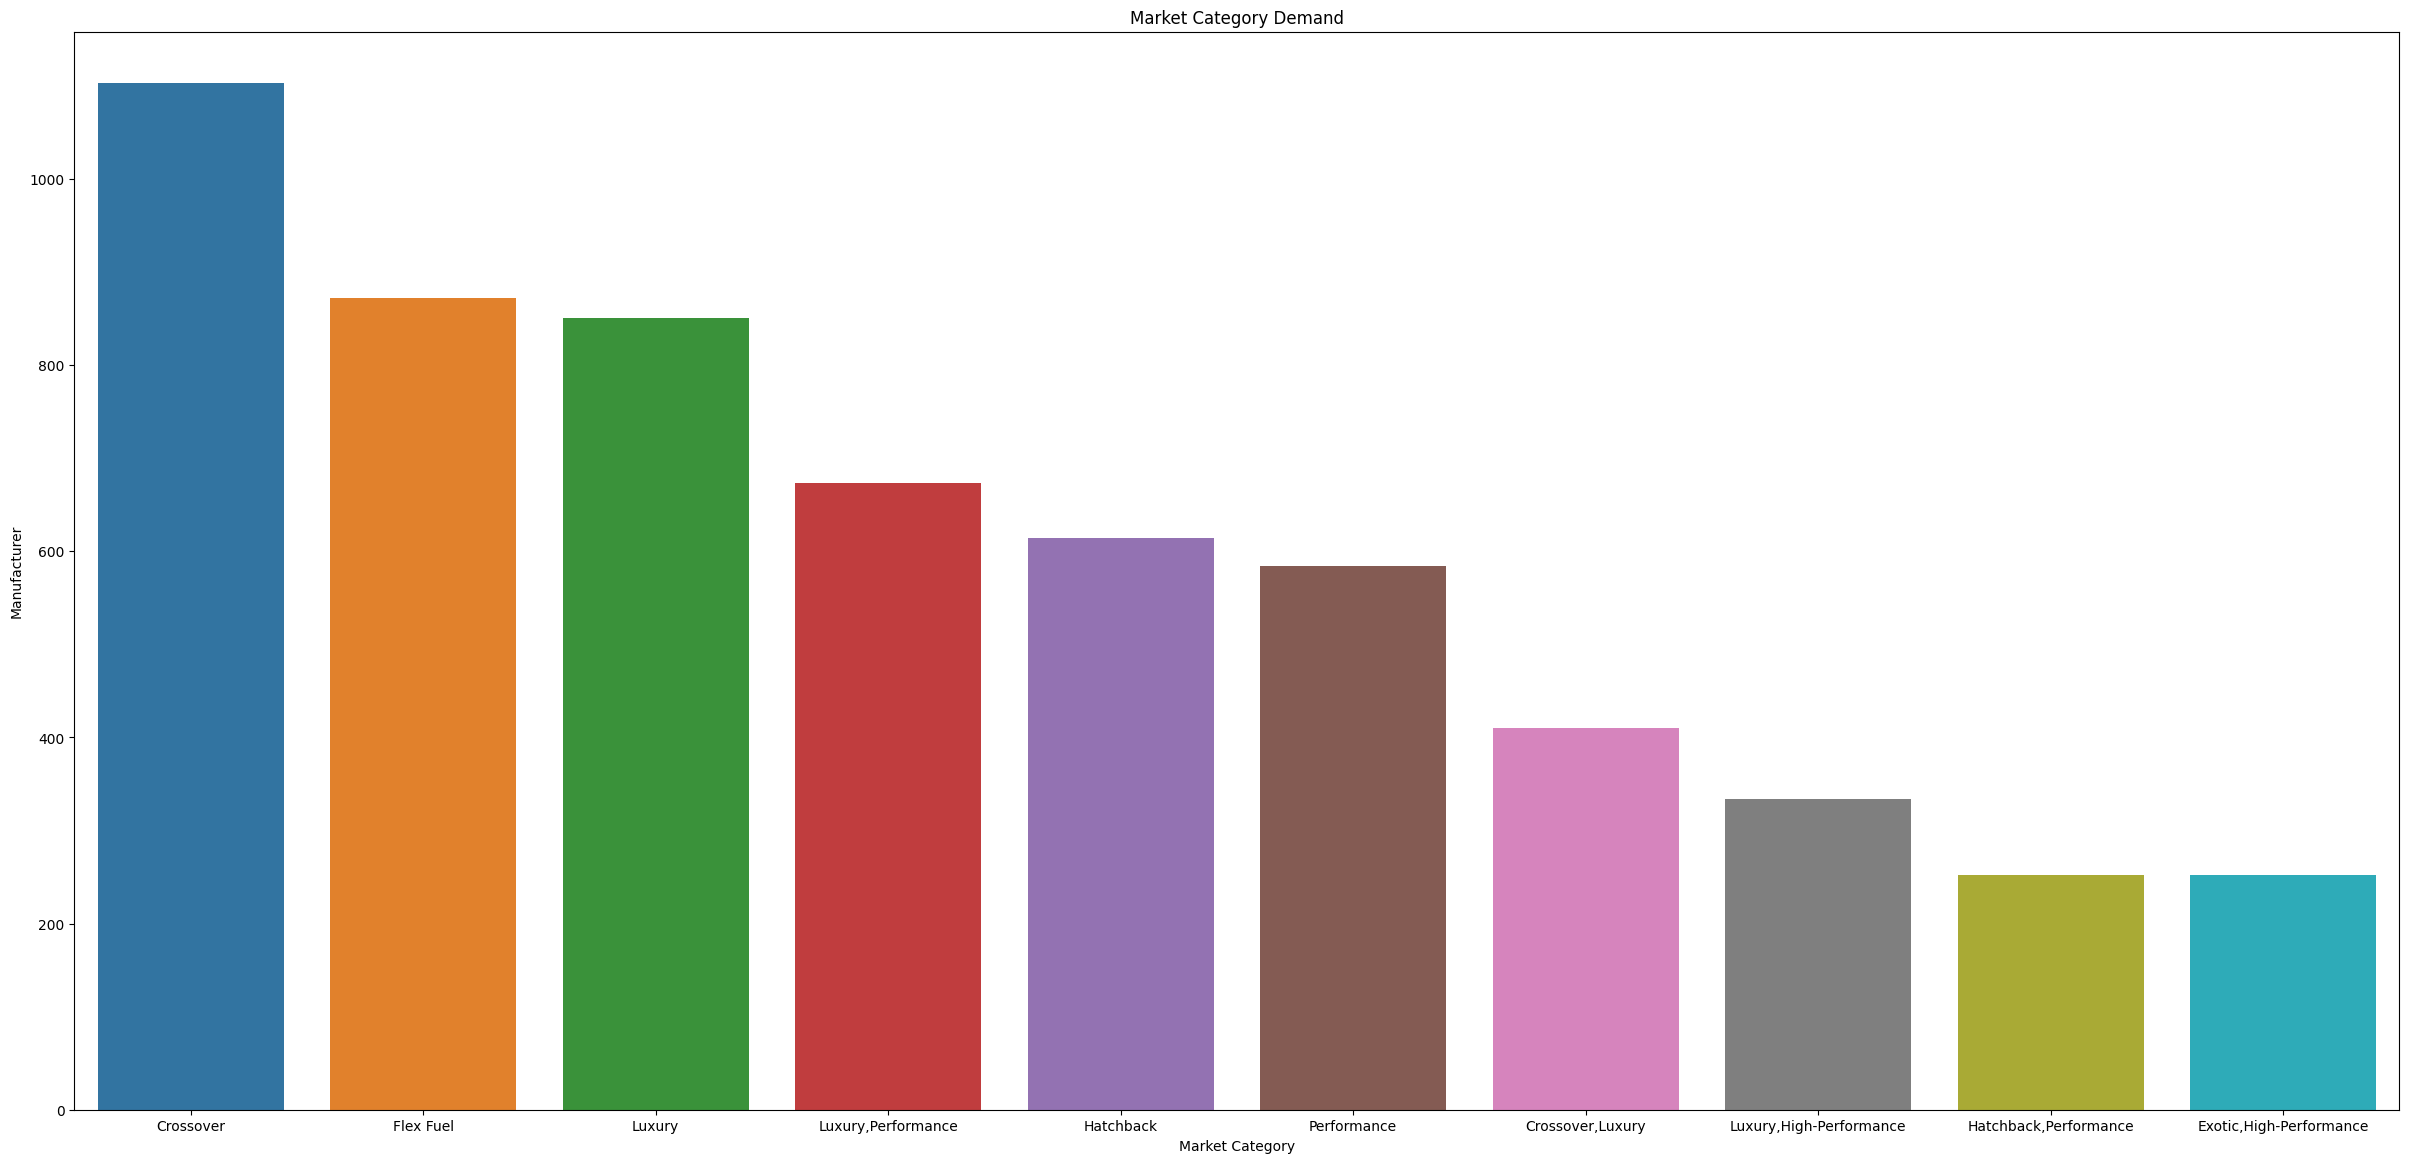

In [83]:
#Top 10 highest Market Category Demand
plt.figure(figsize=(30,14))
sns.barplot(x = 'Market Category',y= 'Manufacturer', data = Market_demand,hue='Market Category')
plt.title('Market Category Demand')
plt.show()

## Engine HP

In [84]:
Power_price= df.groupby(['Engine HP'], as_index=False)['MSRP'].sum().sort_values(by='MSRP', ascending=False).head()

In [85]:
Power_price

,Engine HP,MSRP
229,420,11956710
263,510,11511598
124,240,10853606
92,200,7559338
167,300,7520583


<Figure size 2000x1500 with 0 Axes>

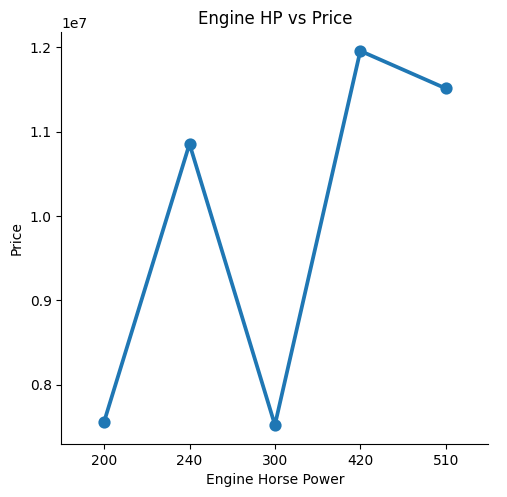

In [86]:
plt.figure(figsize=(20,15))
sns.catplot(x='Engine HP', y='MSRP', data=Power_price, kind='point')
plt.xlabel('Engine Horse Power')
plt.ylabel('Price')
plt.title('Engine HP vs Price')
plt.show()

## Manufacturer

In [87]:
Average_price= df.groupby(['Manufacturer'], as_index=False)['MSRP'].mean().sort_values(by='MSRP', ascending=False).head(10)

In [88]:
Average_price

,Manufacturer,MSRP
6,Bugatti,1.757224e+06
28,Maybach,5.462219e+05
38,Rolls-Royce,3.511306e+05
22,Lamborghini,3.315673e+05
5,Bentley,2.471693e+05
30,McLaren,2.398050e+05
13,Ferrari,2.373838e+05
41,Spyker,2.133233e+05
2,Aston Martin,1.979104e+05
27,Maserati,1.142077e+05


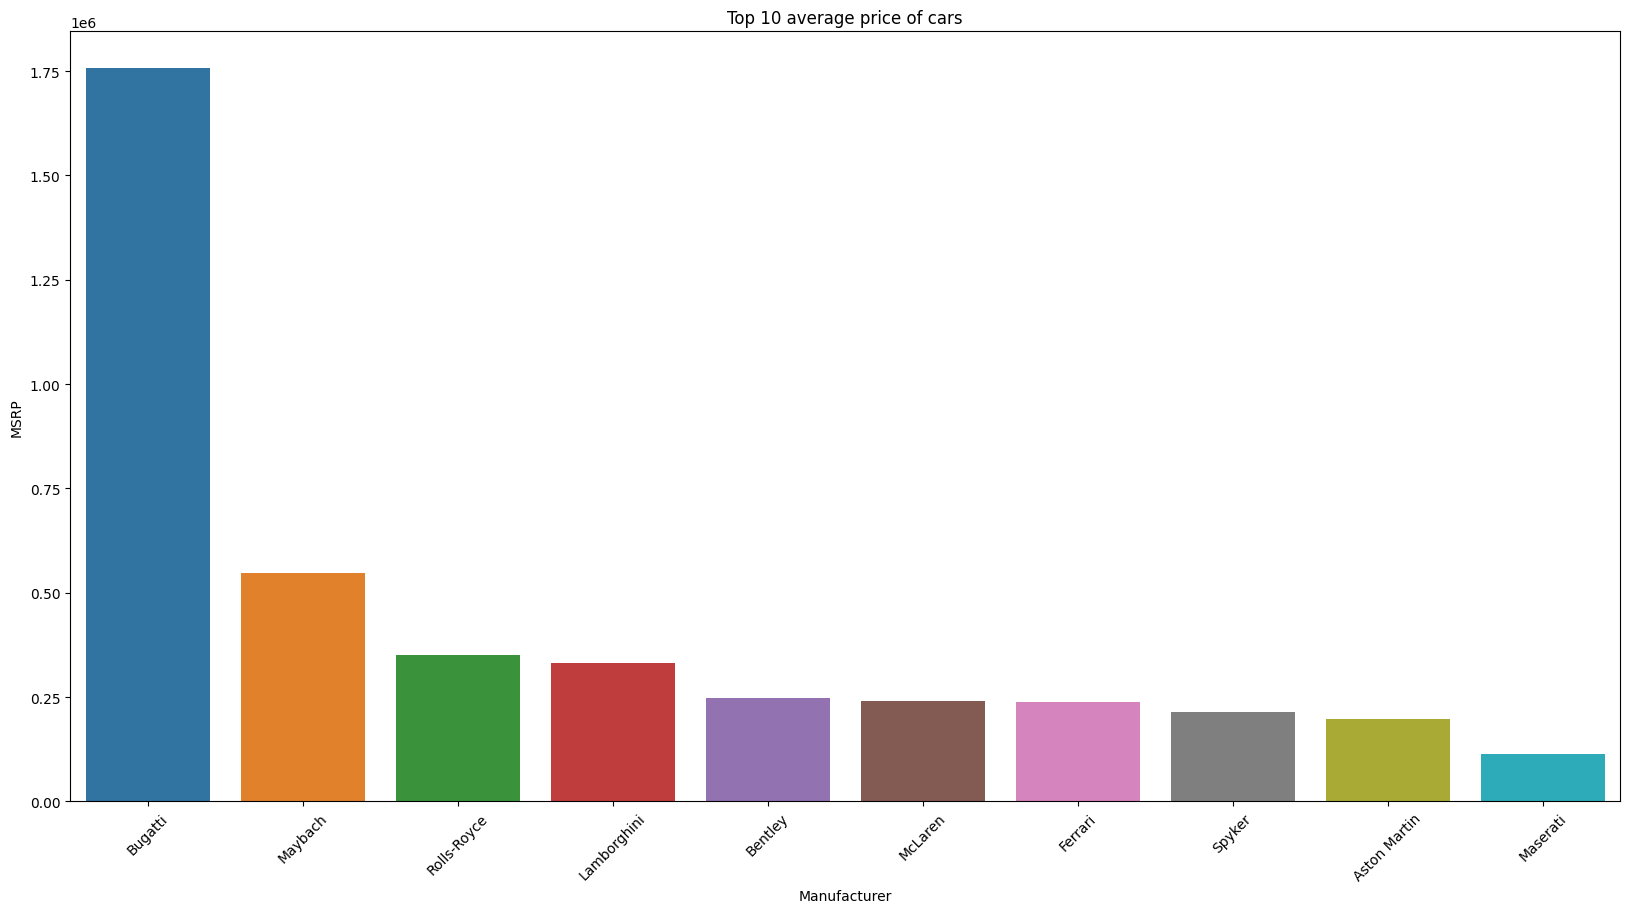

In [89]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Manufacturer',y= 'MSRP', data = Average_price,hue='Manufacturer')
plt.title('Top 10 average price of cars')
plt.xticks(rotation=45)
plt.show()

## Engine Cylinders

<Figure size 2000x1500 with 0 Axes>

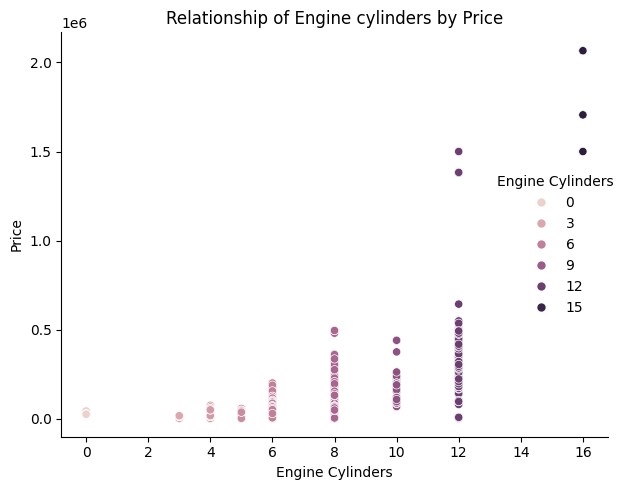

In [90]:
plt.figure(figsize=(20,15))
sns.relplot(data=df, x='Engine Cylinders', y='MSRP',kind='scatter',hue='Engine Cylinders')
plt.xlabel('Engine Cylinders')
plt.ylabel('Price')
plt.title('Relationship of Engine cylinders by Price')
plt.tight_layout()
plt.show()

## Vehicle Style

In [91]:
average_style= df.groupby(['Vehicle Style'], as_index=False)['MSRP'].mean().sort_values(by='MSRP', ascending=False).head(10)

In [92]:
average_style

,Vehicle Style,MSRP
6,Convertible,95465.310448
8,Coupe,94095.310969
14,Sedan,51169.009429
7,Convertible SUV,46134.333333
3,4dr SUV,42420.483516
9,Crew Cab Pickup,39032.566860
12,Passenger Van,35963.150000
1,2dr SUV,34941.357143
15,Wagon,31489.456583
10,Extended Cab Pickup,30866.879581


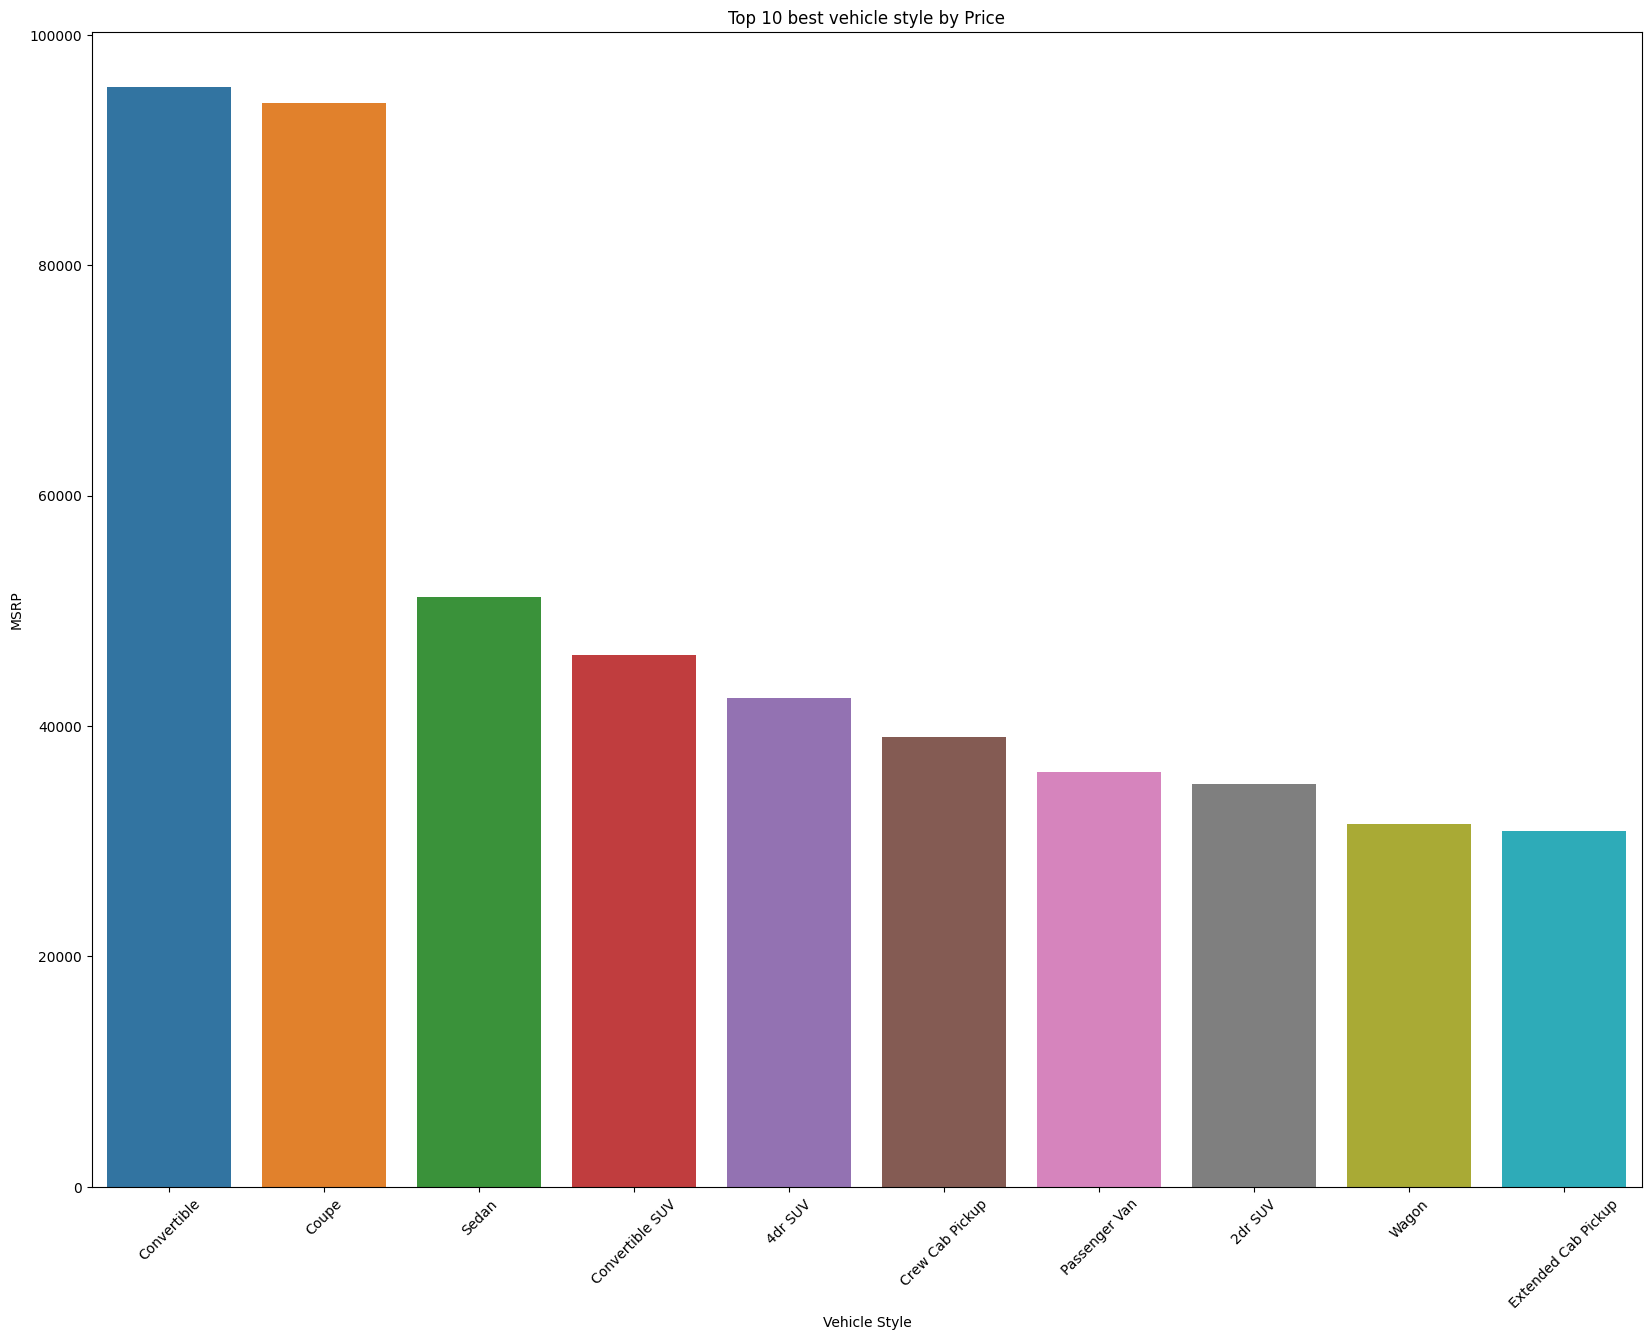

In [115]:
plt.figure(figsize=(20,15))
sns.barplot(x = 'Vehicle Style',y= 'MSRP', data = average_style,hue='Vehicle Style')
plt.title('Top 10 best vehicle style by Price')
plt.xticks(rotation=45)
plt.show()

## Transmission Type

In [94]:
transmission= df.groupby(['Transmission Type'], as_index=False)['Popularity'].mean().sort_values(by='Popularity', ascending=False).head()

In [95]:
transmission

,Transmission Type,Popularity
2,DIRECT_DRIVE,1906.333333
0,AUTOMATED_MANUAL,1661.196721
3,MANUAL,1493.152212
1,AUTOMATIC,1483.715327
4,UNKNOWN,210.000000


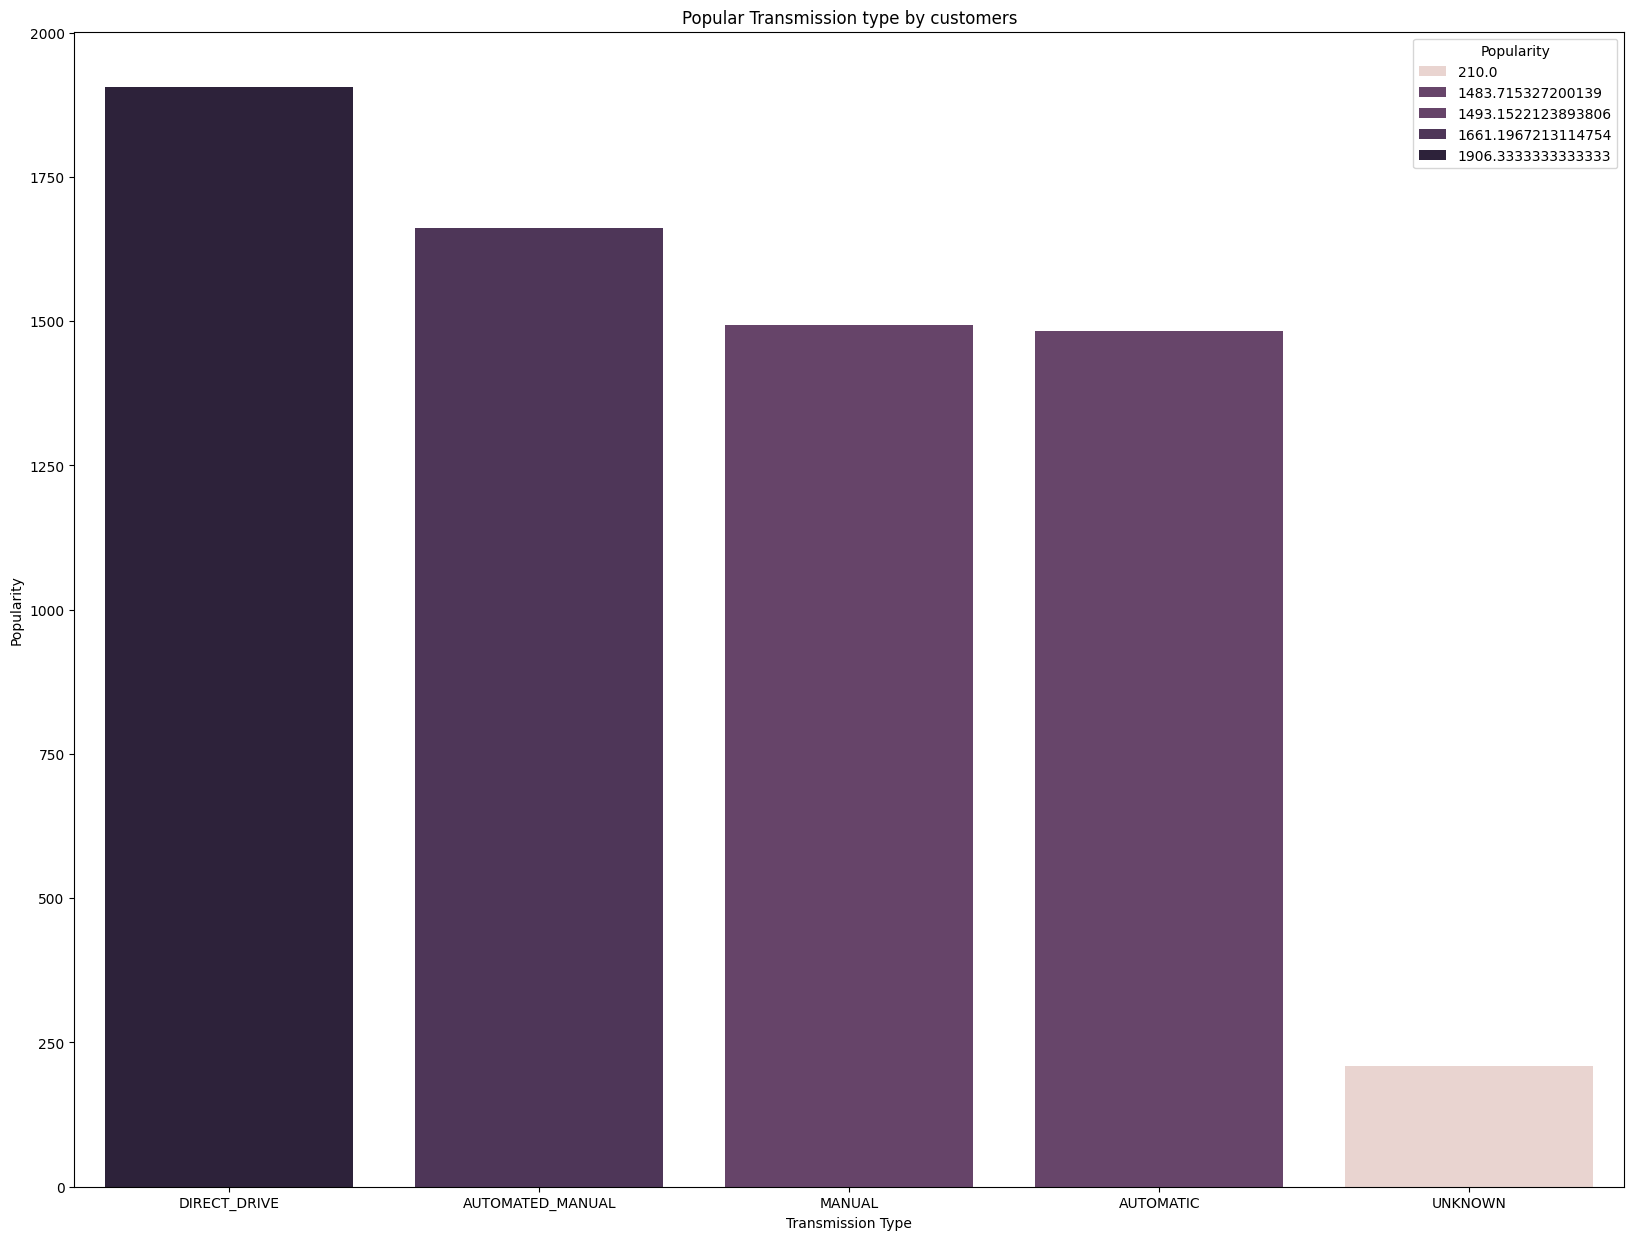

In [96]:
plt.figure(figsize=(20,15))
sns.barplot(x = 'Transmission Type',y= 'Popularity', data =transmission,hue='Popularity')
plt.title('Popular Transmission type by customers')
plt.show()

## Engine Fuel Type

In [97]:
Fuel= df.groupby(['Engine Fuel Type'], as_index=False)['MSRP'].mean().sort_values(by='MSRP', ascending=False)

In [98]:
Fuel

,Engine Fuel Type,MSRP
3,flex-fuel (premium unleaded required/E85),159429.351852
6,premium unleaded (required),102846.929549
2,flex-fuel (premium unleaded recommended/E85),48641.923077
5,premium unleaded (recommended),41103.335816
0,diesel,40729.098039
4,flex-fuel (unleaded/E85),36480.988649
1,electric,34511.923077
7,regular unleaded,26366.412318


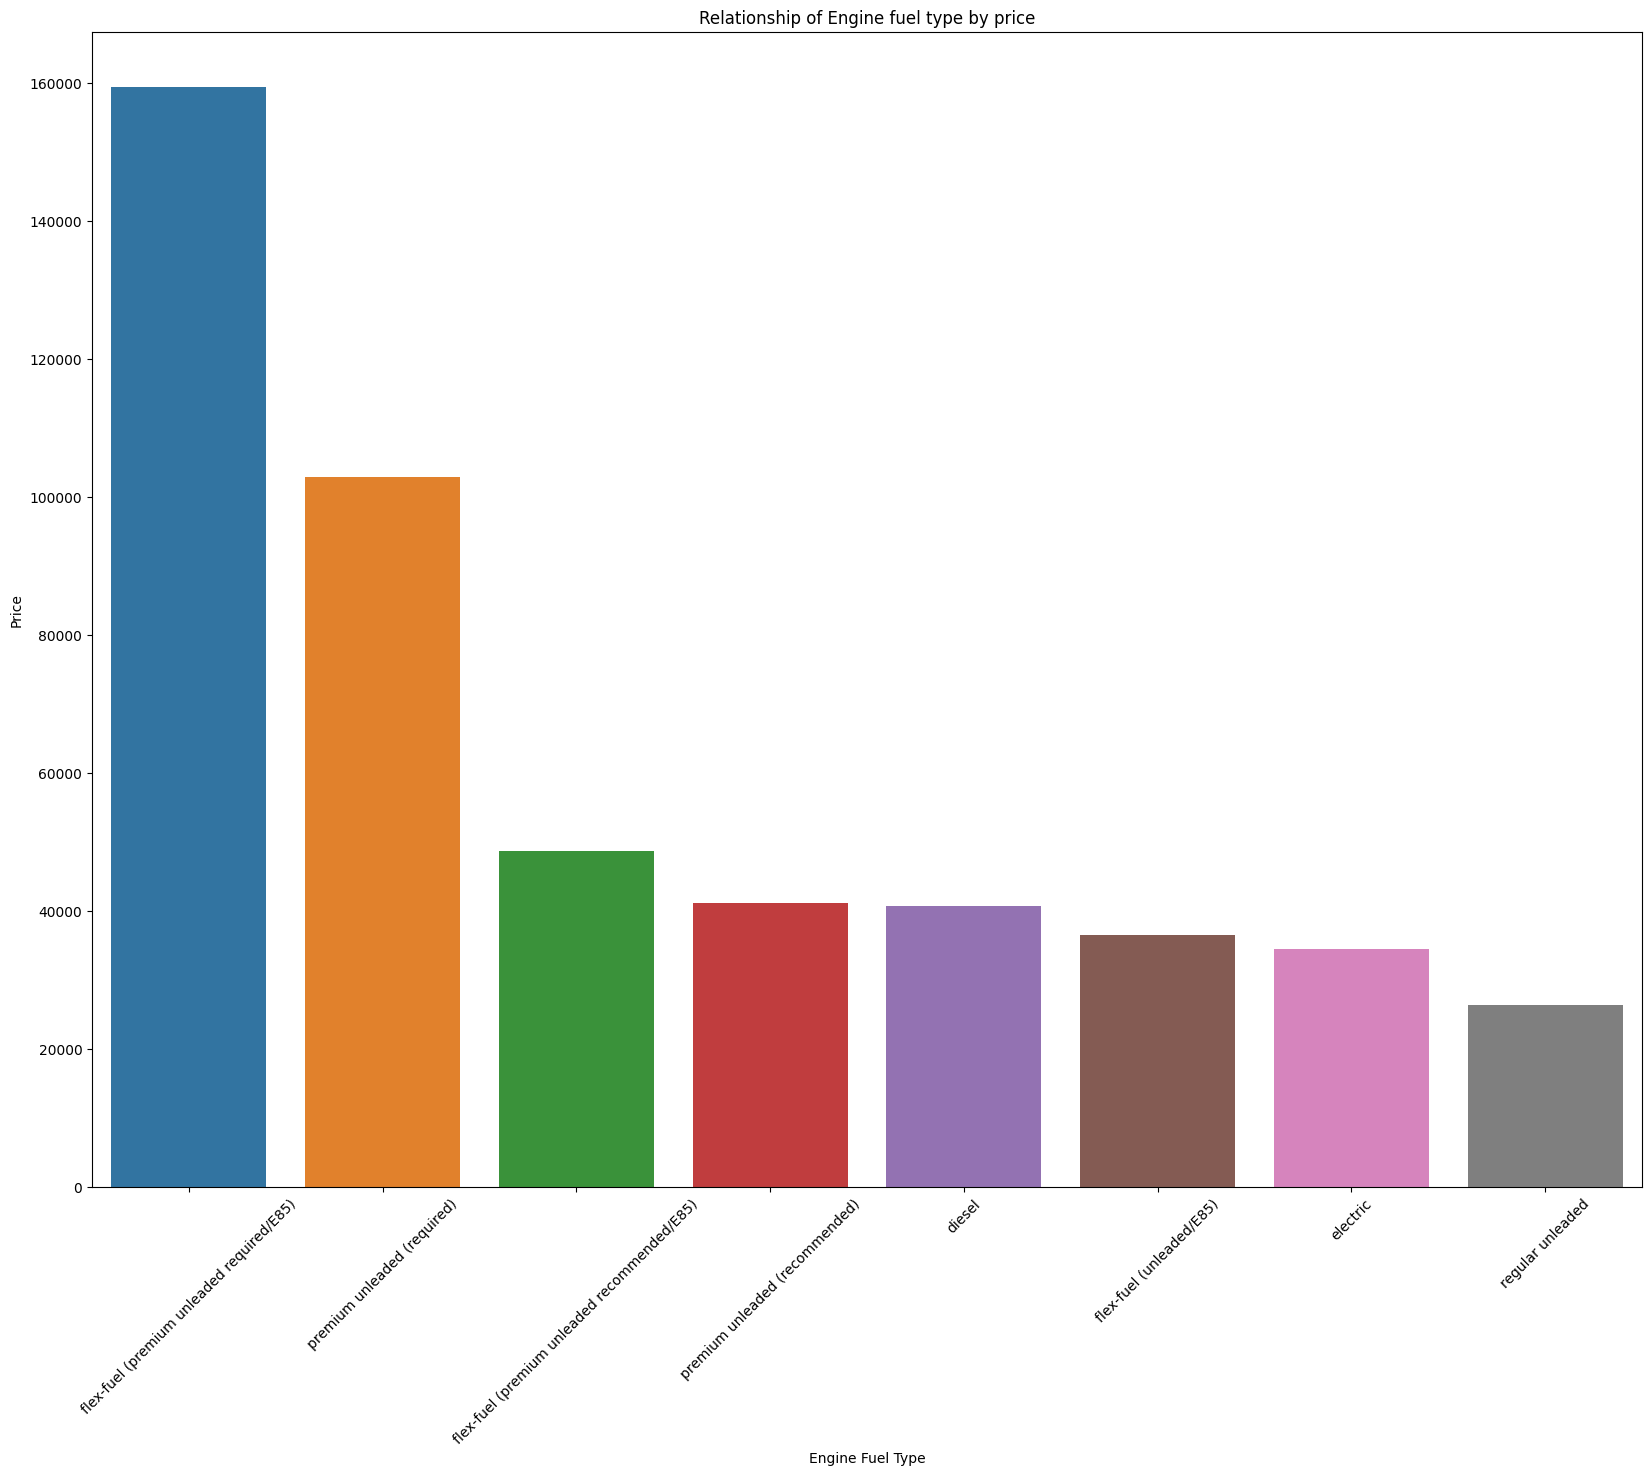

In [99]:
plt.figure(figsize=(20,15))
sns.barplot(x = 'Engine Fuel Type',y= 'MSRP', data =Fuel,hue='Engine Fuel Type')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Price')
plt.title('Relationship of Engine fuel type by price')
plt.xticks(rotation=45)
plt.show()

## Driven Wheels

In [110]:
wheels= df.groupby(['Driven_Wheels'], as_index=False)['Popularity'].mean().sort_values(by='Popularity', ascending=False)

In [111]:
wheels

,Driven_Wheels,Popularity
3,rear wheel drive,1649.644731
1,four wheel drive,1535.600619
0,all wheel drive,1532.074143
2,front wheel drive,1341.480028


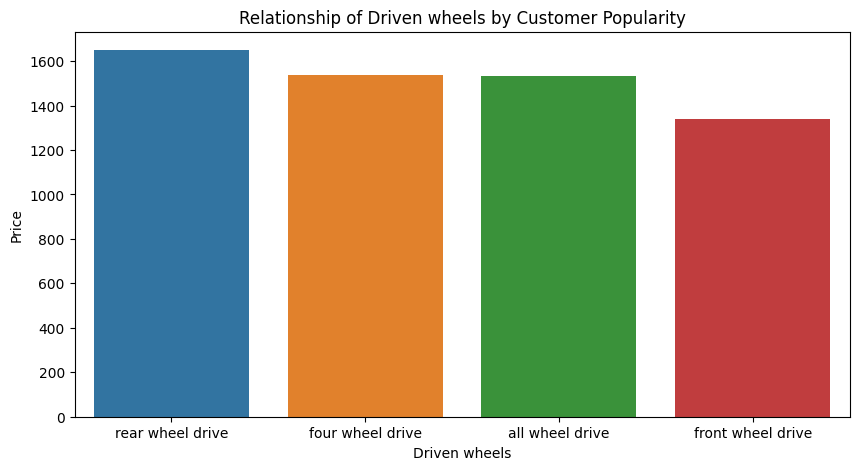

In [120]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Driven_Wheels',y= 'Popularity', data =wheels,hue='Driven_Wheels')
plt.xlabel('Driven wheels')
plt.ylabel('Price')
plt.title('Relationship of Driven wheels by Customer Popularity')
plt.show()

## Vehicle Size

In [116]:
size= df.groupby(['Vehicle Size'], as_index=False)['MSRP'].mean().sort_values(by='MSRP', ascending=False)

In [117]:
size

,Vehicle Size,MSRP
1,Large,67392.884822
2,Midsize,45590.581111
0,Compact,44183.711089


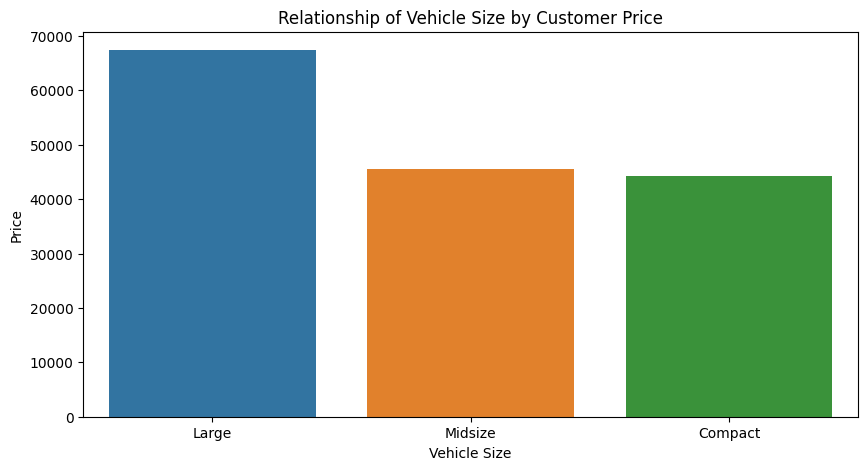

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Vehicle Size',y= 'MSRP', data =size,hue='Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Price')
plt.title('Relationship of Vehicle Size by Customer Price')
plt.show()